# Diamonds

The diamonds dataset is a well known dataset. It's one of the basic examplesets you get in the R-programming suite, but you can also [download](https://www.kaggle.com/datasets/shivam2503/diamonds) it as a csv. We've done that for you, however. But still we have some exercises using it (and drawing pretty graphs, of course).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("files/diamonds.csv", index_col=0)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Also describe the dataset, so you have an idea of how big it is and what sizes we are talking about.

In [2]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Create a bar-chart showing how many diamonds there are of every cut. You can use matplotlib and grouping, but easier would be to use seaborn's countplot.

<Axes: xlabel='cut', ylabel='count'>

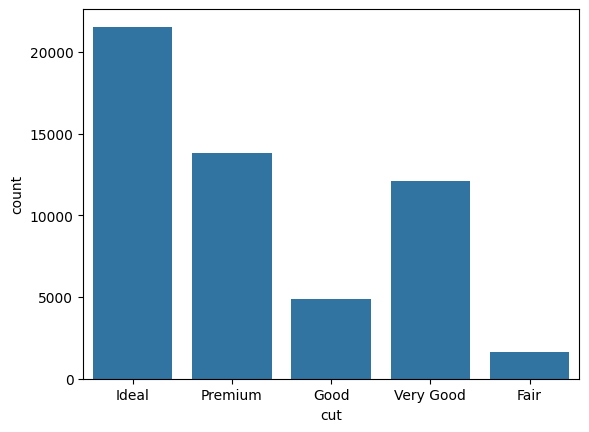

In [3]:
# DELETE

sns.countplot(x="cut", data=df)

The bottom line of the previous graph is:

![](files/2022-08-30-13-39-46.png)

Which isn't good because there is an order in the cut of diamonds. It's:

<code>['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']</code>


Turn the "cut"-column into an ordered categorical column. You can use the list in this markdown-cell. We have a second one of those lists:

<code>['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']</code>

This is the "clarity", another ordered categorical.

In [4]:
# DELETE

from pandas.api.types import CategoricalDtype

cut_type = CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df["cut"] = df['cut'].astype(cut_type)

cat_clarities = CategoricalDtype(categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
df ['clarity'] = df['clarity'].astype(cat_clarities)

Now recreate the previous graph. The labels on the axis should be sorted correctly now.

<Axes: xlabel='cut', ylabel='count'>

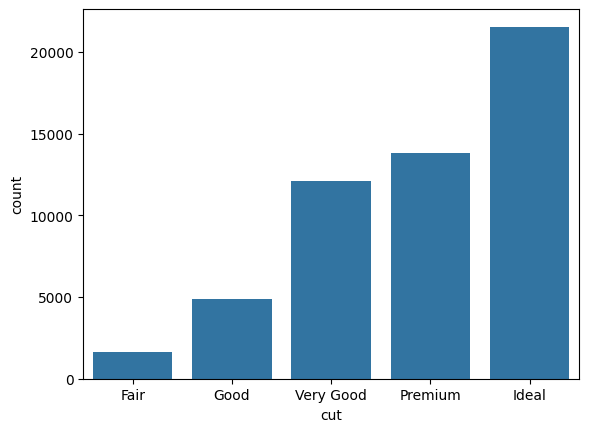

In [5]:
#DELETE

sns.countplot(x="cut", data=df)

Show a distribution of diamonds by size (aka carat). Try to do it in three words. (A _histogram_ on _carat_ in the dataset _df_, but in reverse).

<Axes: >

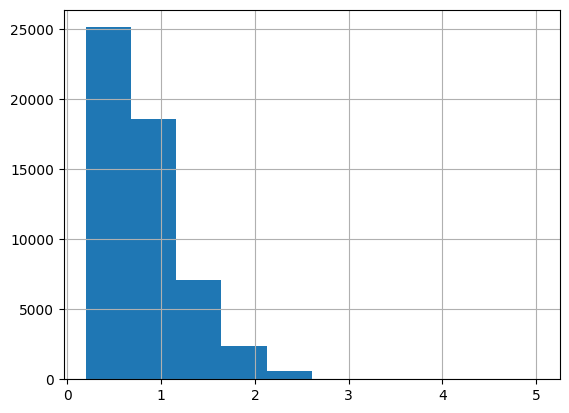

In [6]:
# DELETE

df.carat.hist()

# or plt.hist(df['carat'])


A good plot, but when doing histograms the bin width is important. Draw four with varying bin widths (5, 10, 20 and 40).

Text(0, 0.5, 'Frequency')

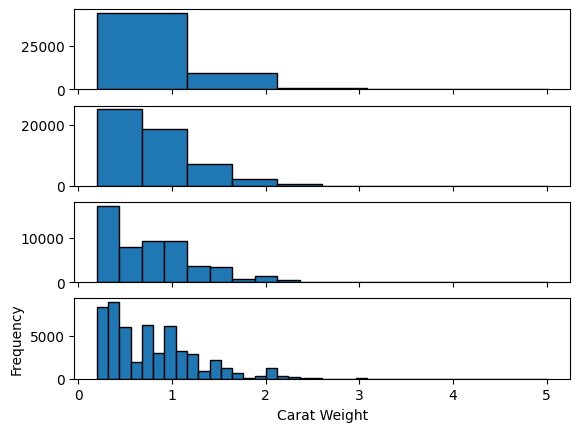

In [7]:
# DELETE

# figure, axis = plt.subplots(1, 3, figsize=(15,5))
# # plt.figure(figsize=(1, 3))

# axis[0].hist(df.carat, bins=5)
# axis[0].title.set_text("Not enough (5)")
# axis[1].hist(df.carat, bins=10)
# axis[1].title.set_text("Default (10)")
# axis[2].hist(df.carat, bins=40)
# axis[2].title.set_text("Too much (40)")


fig, axs = plt.subplots(nrows=4, ncols=1,sharex=True)
axs[0].hist(df['carat'],bins=5, ec='black')
axs[1].hist(df['carat'],bins=10, ec='black')
axs[2].hist(df['carat'],bins=20, ec='black')
axs[3].hist(df['carat'],bins=40, ec='black')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')


Carat weight distribution is skewed. What does this mean?

(In the following code block you should only write text. It's a small statistical interpretation that you can get on the exam as well.)

In [8]:
# DELETE

# A left skewed distribution means that majority diamonds in this dataset have
# an average low carat weight.

In the last graph you notice that more is going on in this dataset. There are spikes. Also, why is does the line go to 5 when the last datapoint is at 3?

Show the diamonds with a carat size above 3.5. How many are there?

In [9]:
# DELETE
print(len(df[ df.carat > 3.5]))
df[ df.carat > 3.5]

9


,carat,cut,color,clarity,depth,table,price,x,y,z
23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


These are what we call outliers. They're not that interesting, especially since we're talking about 9 observations in a list of 50.000 of them.

So draw:
* A histogram
* 200 bins
* Carat size beneath 3.5

Text(0, 0.5, 'Frequency')

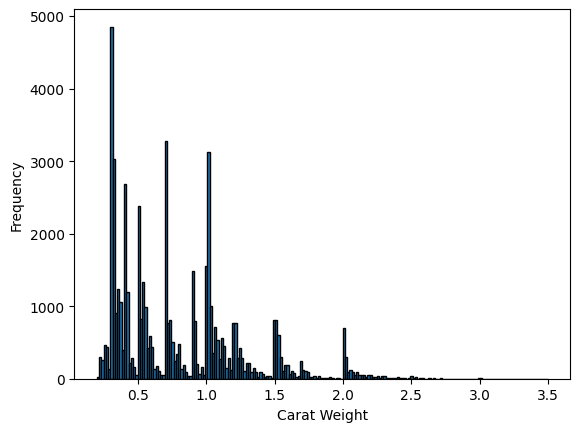

In [10]:
# DELETE

# df[ df.carat <= 3.5].carat.hist(bins=200)

df_new = df[df['carat']<=3.5]
plt.hist(df_new[ 'carat'],bins=200, ec='black')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')

Another non-technical question:

* Which values are most common? Why?
* Which values are rare? Why? Is this expected?
* Why are there more values to the right of the peak?
* Why almost no diamonds bigger than 3 carats?
* There seem to be (sub)groups, or clusters, of similar values.
    * How are observations in cluster similar?
    * How are observations from separate clusters different?

To interpret, image you are buying (or receiving) a diamond engagement ring. What sounds bigger, 1 carat or 0.99 carats?

In [12]:
# # DELETE

# - The whole numbers
# - The numbers just under whole numbers, as it's not interesting to have a diamond that is 0.99 carat (1 sounds much bigger)
# - You have to gues the final weight of a diamond before cutting.
# - Big diamonds are rare.
# - More graphs!

Plot 100 bins in a histogram on the Y value (which is the depth of the diamong in mm).

<Axes: >

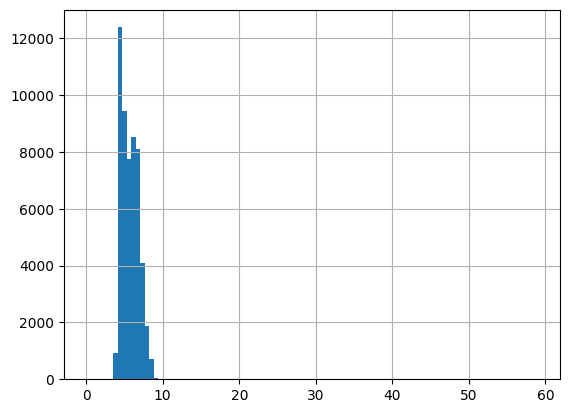

In [13]:
# DELETE

df.y.hist(bins=100)

Many outliers here! Show price, x, y and z for every diamond with Y bigger than 20 or smaller than 3. The bins start at 0 and end at 58.9, while most observations lie between 3 and 10.

Show the records with a y-size smaller than 3 or bigger than 10.

In [14]:
# DELETE

df[ (df.y < 3) | (df.y > 20)][['price','x','y','z']]

,price,x,y,z
11964,5139,0.00,0.0,0.00
15952,6381,0.00,0.0,0.00
24068,12210,8.09,58.9,8.06
24521,12800,0.00,0.0,0.00
26244,15686,0.00,0.0,0.00
27430,18034,0.00,0.0,0.00
49190,2075,5.15,31.8,5.12
49557,2130,0.00,0.0,0.00
49558,2130,0.00,0.0,0.00


You should note that:

* A couple of diamonds have no size (in this dataframe) and should not be considered in this graph.
* There's a diamond 5.8cm wide that only costs $12k.

Redraw the graph without these values.

<Axes: >

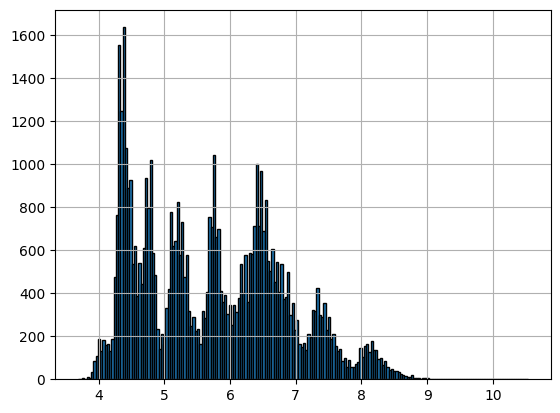

In [15]:
# DELETE

df_filtered_y = df[(df.y>3) & (df.y< 20)]
df_filtered_y.y.hist(bins=200, ec='black')

We have ignored the complete observations now, which was fine because we were only looking at Y. But when continuing to work with a dataset we can't just drop the observations because that would mean we lose all data in those rows.

So set all X, Y and Z values of 0 or 20 or more to NA. Use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace) or [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [16]:
# DELETE

for field in ['x','y','z']:
    df.loc[ df[field] >= 20, field] = pd.NA
    df.loc[ df[field] == 0, field] = pd.NA
    
# df.loc[(df['x']==0) | (df['x']>20),'x']=np.nan
# df[df['x']==np.nan]
# df.loc[(df['y']==0) | (df['y']>20),'y']=np.nan
# df[df['y']==np.nan]
# df.loc[(df['z']==0) | (df['z']>20),'z']=np.nan
# df[df['z']==np.nan]

Now show a list of all diamonds where X, Y or Z is Na.

In [17]:
df[(df['x']).isna()|(df['y']).isna()|(df['z']).isna()]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,NaN
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,NaN
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,NaN
15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,NaN,8.06


Now show the same table as before. Which is very hard because the old code won't work. But we saved you a list of line numbers:

<code>[11964,15952,24068,24521,26244,27430,49190,49557,49558]</code>

Use [iloc](https://www.statology.org/pandas-select-rows-by-index/).

(Getting the wrong lines? There is a difference between the line number and the index. This difference is 1 (index is 0-based, line number is 1-based).)

In [18]:
# DELETE

list = [11964,15952,24068,24521,26244,27430,49190,49557,49558]
index_list = [item - 1 for item in list]
df.iloc[index_list]

,carat,cut,color,clarity,depth,table,price,x,y,z
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,NaN,8.06
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,NaN,5.12
49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


And a new histogram on Y without the filtering?

<Axes: >

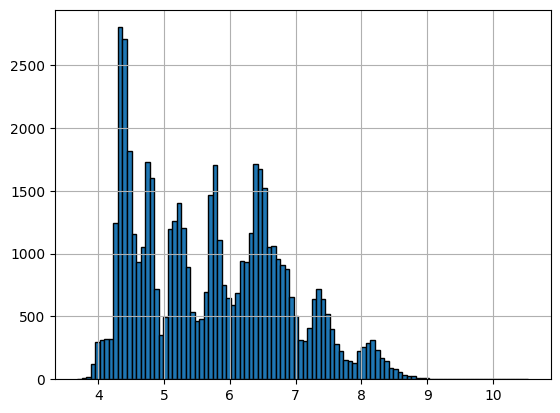

In [19]:
# DELETE

df['y'].hist(bins=100, ec='black')

Based on this histogram, does a boxplot look like a good idea?

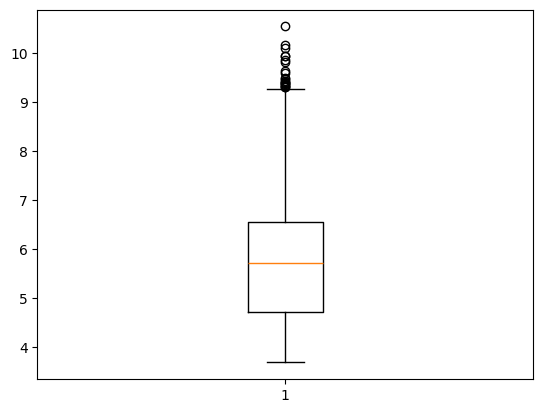

In [20]:
# DELETE

plt.boxplot(df[  df.y.isna() == False ].y)
plt.show()

# df.boxplot( column =['y'], grid = False)

No. You miss out on all of the nuances of sizes. Now do multiple boxplots (using seaborn) with all prices per cut.

<Axes: title={'center': 'price'}, xlabel='cut'>

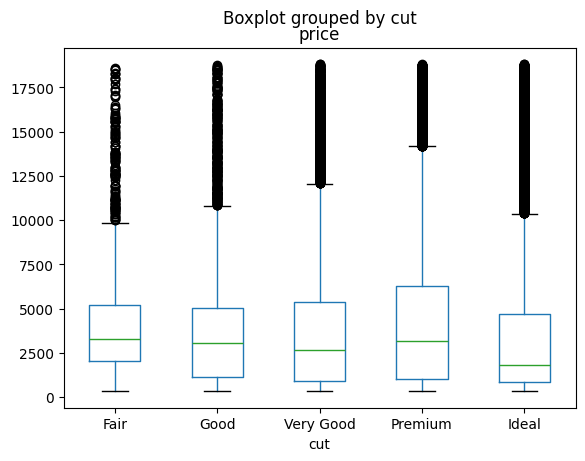

In [21]:
# DELETE

df.boxplot(by ='cut', column =['price'], grid = False)

Looks wrong, doesn't it? You would expect the premium and ideal diamonds to be more expensive.

Although the best cut type is Ideal, its price is the lowest. According to the average prices, the most expensive diamonds belong to Premium and Fair cut types. These results present that cut is not enough to explain response variable price, since price does not increase while cut feature improves.

Do the same, but show the weight in stead of the price.

<Axes: title={'center': 'carat'}, xlabel='cut'>

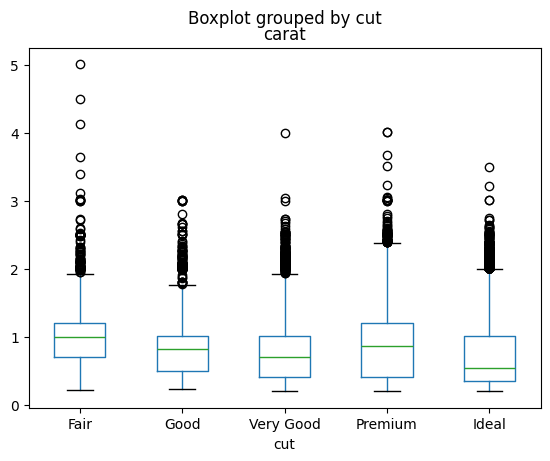

In [22]:
# DELETE

# sns.boxplot(data=df, x='cut', y='carat')

df.boxplot(by ='cut', column =['carat'], grid = False)

Still the same picture. Maybe the color comes into play? The color of the diamond goes from D (best) to J (worst) (categoric variable).

<Axes: title={'center': 'price'}, xlabel='color'>

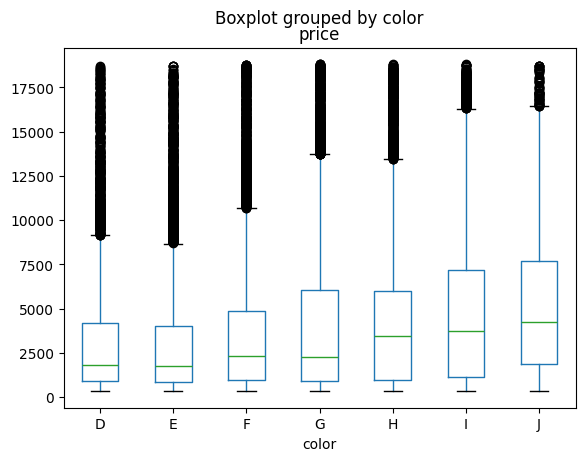

In [23]:
# DELETE

df.boxplot(by ='color', column =['price'], grid = False)

Although the best color type is D, its price is one of the lowest. According to the average prices, the most expensive diamonds belong to J and I cut types which are actually the worst two color type in this dataset. These results clearly show that color is not enough to explain response variable price, since price does not increase while the color feature improves.

Compare the cut with the clarity on average price. Clarity is a measurement of how clear the diamond is, from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)(categoric variable).

Both are categorical variables by the way, so a [crosstable](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) would be a good idea.

In [24]:
# DELETE

pd.crosstab(index=df.cut,columns= df.clarity, values=df.price, aggfunc='mean' )

clarity,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
cut,,,,,,,,
Fair,3703.533333,5173.916309,4208.279412,4174.724138,4165.141176,3349.768116,3871.352941,1912.333333
Good,3596.635417,4580.260870,3689.533333,4262.236196,3801.445988,3079.108392,2254.774194,4098.323944
Very Good,4078.226190,4988.688095,3932.391049,4215.759552,3805.353239,3037.765182,2459.441065,4396.216418
Premium,3947.331707,5545.936928,4455.269371,4550.331248,4485.462041,3795.122989,2831.206169,3856.143478
Ideal,4335.726027,4755.952656,3752.118169,3284.550385,3489.744497,3250.290100,2468.129458,2272.913366


When cut improves and clarity improves the price isn't higher. So both variables are not enough to explain the price of a diamond.

What would happen if we plot the price vs the carat? Both are continuos variables, so a scatterplot is fine.

You could simply write <code>plt.scatter(df.carat, df.price)</code>, but there would be much room for improvement.

* There are 50.000 dots on there. Make sure they are small enough.
* Add titles on the axes.
* Add a trendline in the first order
* Add a trendline in the fourth order
* Make sure Y is limited between 0 en 20.000 (no values there, but the trendlines want to get out of those limits)

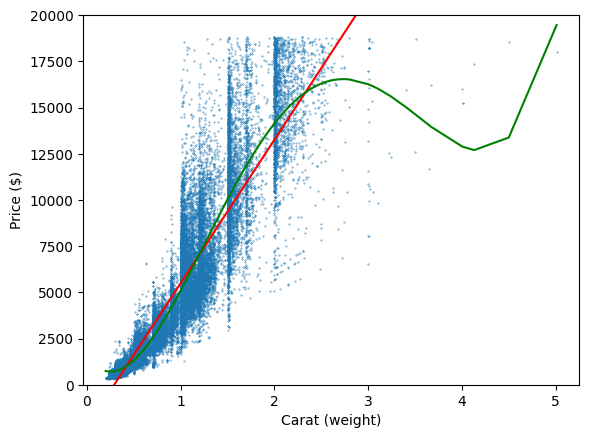

In [25]:
# DELETE

plt.scatter(df.carat, df.price, s=0.1)
plt.xlabel("Carat (weight)")
plt.ylabel("Price ($)")

z = np.polyfit(df.carat, df.price, 1)
p = np.poly1d(z)
plt.plot(df.carat.sort_values(), p(df.carat.sort_values()), c='red')

z = np.polyfit(df.carat, df.price, 4)
p = np.poly1d(z)
plt.plot(df.carat.sort_values(), p(df.carat.sort_values()), c='green')

plt.ylim([0,20000])

plt.show()

Note the covariance: if price goes up, so goes the weight. Maybe it's the other way around, but you would need a domain-specialist for that (or some common sense). Although covariance or correlation don't always imply causality.

![](files/2022-08-31-15-35-41.png)

[spurious-correlations](http://www.tylervigen.com/spurious-correlations)